# Preparation :: probabilistic distribution

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import tqdm

## 1. Bernoulli distribution

0.4000000000000001 0.6
Mean= 0.6 , Covariance= 0.24


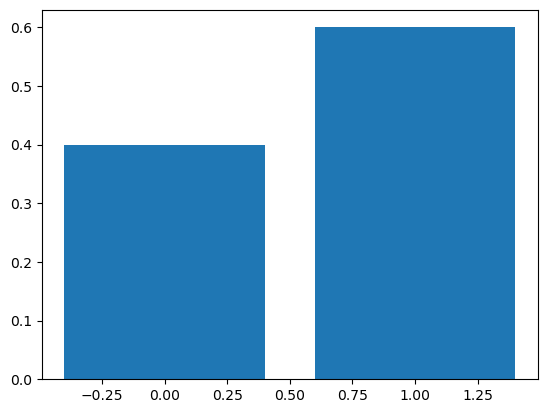

In [2]:
d = stats.bernoulli(0.6) #Bern(x|theta) = theta^x * (1-theta)^(1-x) -> theta = 0.6
X = d.rvs(100) #x=100
#check probability for each output, here 0 or 1
print(d.pmf(0), d.pmf(1))
#plot 
plt.bar([0,1],d.pmf([0,1]))
print("Mean=",d.mean(),", Covariance=",d.var())

## 2. Categorical Distribution

outputs of categorical distribution=
 [0, 2, 1, 2, 0, 2, 0, 3, 1, 1, 2, 3, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 2, 1, 3, 2, 2, 3, 2, 0, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 0, 3, 2, 2, 1, 0, 3, 3, 2, 2, 0, 2, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 0, 2, 3, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 3, 3, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0]
probability mass fucntion =
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


<BarContainer object of 4 artists>

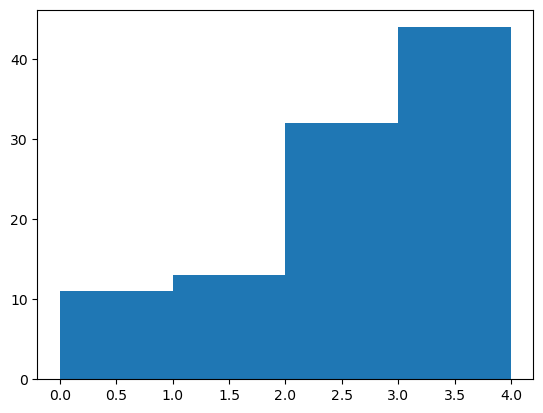

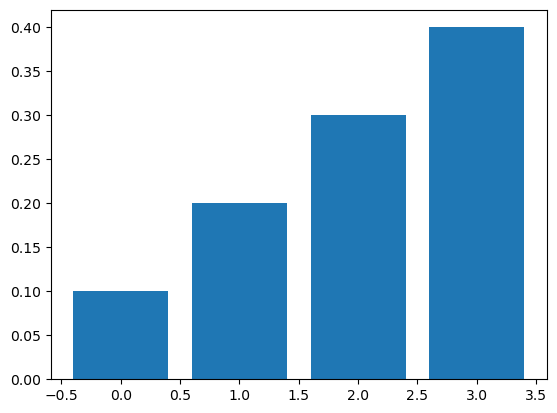

In [3]:
#define -> N=1 of multinomial distribution
cat_dist = stats.multinomial(1, [0.1,0.2,0.3,0.4])

#number of outputs
K = len(cat_dist.p)

#make samples
X_onehot = cat_dist.rvs(100)
#print("outputs of categorical distribution with one-hot expression=\n",X_onehot)

#check outputs
X = [np.argmax(x) for x in X_onehot]
print("outputs of categorical distribution=\n",X)

#plot outputs data
plt.figure(0)
plt.hist(X,bins=range(K+1))

#plot probability mass function
X_tmp = np.identity(K)[range(K)]
print("probability mass fucntion =\n",X_tmp)

#plot
plt.figure(1)
plt.bar(range(K),cat_dist.pmf(X_tmp))

## 3. Binomial Distribution

mean=  1.613
variance=  1.183231


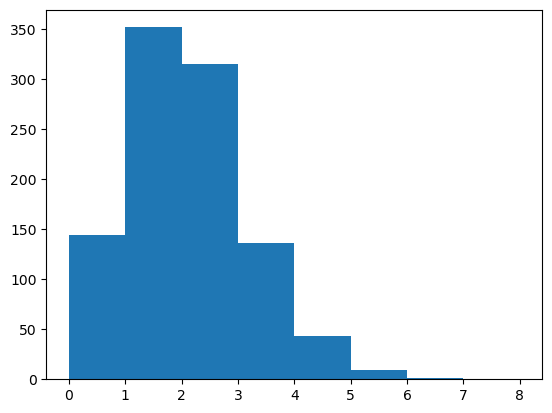

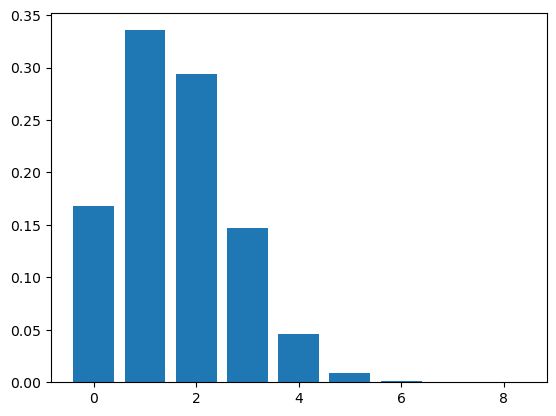

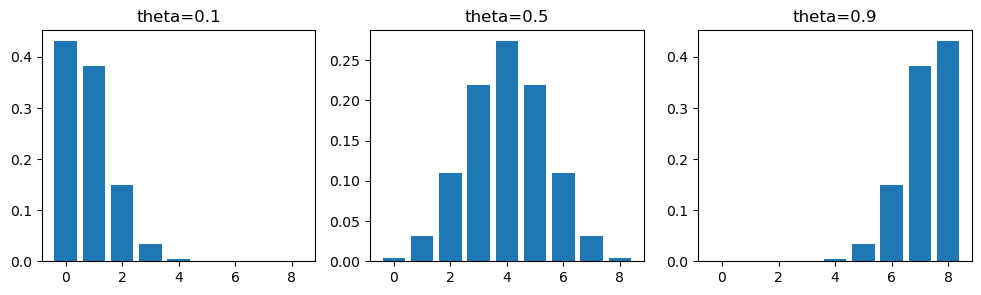

In [8]:
N=8
theta=0.2
bin_dist = stats.binom(N,theta)

#make samples
X = bin_dist.rvs(1000)

#mean, variance
print("mean= ", np.mean(X))
print("variance= ",np.std(X)**2)

#histogram
plt.figure(1)
plt.hist(X,range(N+1))

#pms plot
ar = np.arange(0,N+1)
plt.figure(2)
plt.bar(ar,bin_dist.pmf(ar))

#different mu
fig,ax = plt.subplots(1,3,figsize=(12,3))
thetas = [0.1,0.5,0.9]
for i in range(len(thetas)):
    bin_dist = stats.binom(N,thetas[i])
    ax[i].bar(ar,bin_dist.pmf(ar))
    ax[i].set_title("theta="+str(thetas[i]))

### 4.Poison Distribution

mean= 3.07
variance =  3.1851000000000003


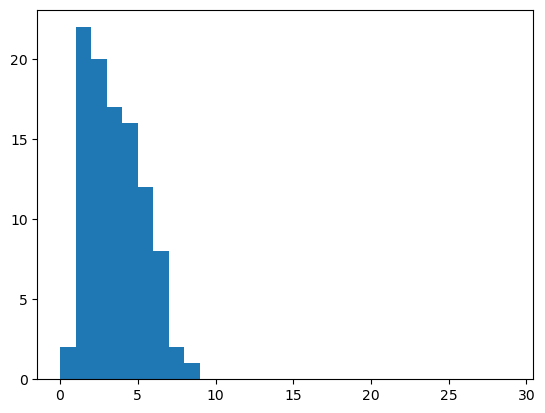

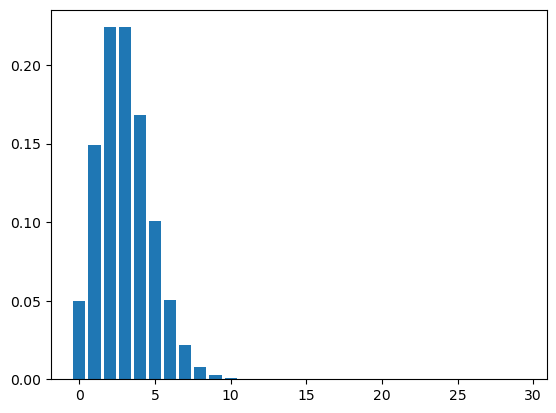

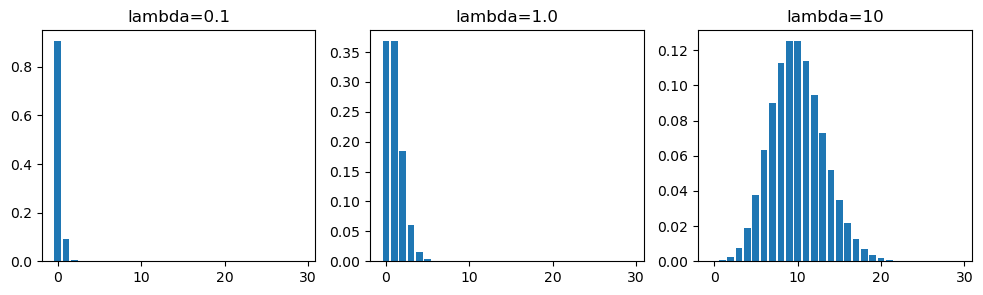

In [13]:
LAMBDA=3.0
poi_dist = stats.poisson(LAMBDA)

X = poi_dist.rvs(100)

#mean, variance
print("mean=",np.mean(X))
print("variance = ", np.std(X)**2)

#plot historgram
ar = np.arange(30)
plt.figure(1)
plt.hist(X,ar)

#plot pmf
plt.figure(2)
plt.bar(ar,poi_dist.pmf(ar))

#differenc lambda
fig,ax = plt.subplots(1,3,figsize=(12,3))
lambdas = [0.1,1.0,10]
for i in range(len(lambdas)):
    poi_dist = stats.poisson(lambdas[i])
    ax[i].bar(ar,poi_dist.pmf(ar))
    ax[i].set_title("lambda="+str(lambdas[i]))

### 5. Gaussian Distribution

Mean= -0.00973413289378957
Variance= 0.9724562024539627


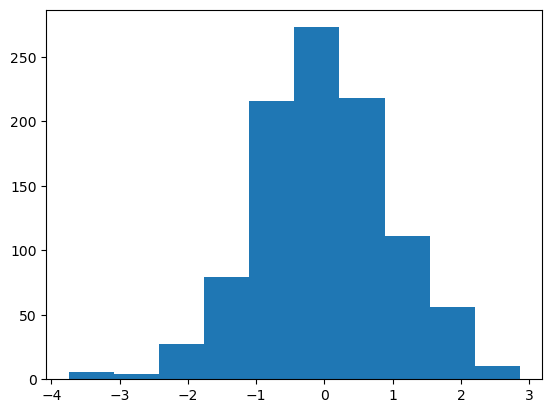

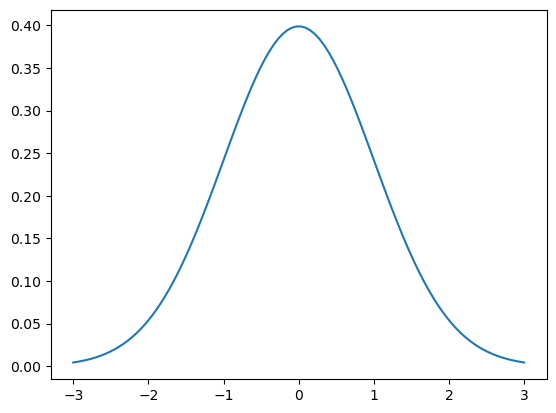

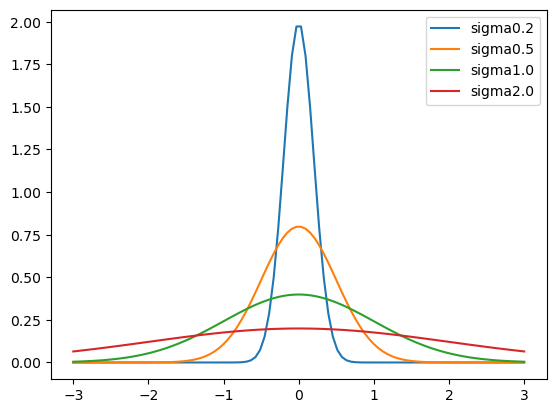

In [16]:
normal_dist = stats.norm(0.0,1.0)

X = normal_dist.rvs(1000)

#basic status
print("Mean=",np.mean(X))
print("Variance=",np.std(X)**2)
plt.figure(1)
plt.hist(X,bins=10)

#density function
plt.figure(2)
ls = np.linspace(-3,3,100)
plt.plot(ls,normal_dist.pdf(ls))

#each sigma
plt.figure(3)
sigmas = [0.2,0.5,1.0,2.0]
for i,sigma in enumerate(sigmas):
    norm_dist = stats.norm(0.0,sigma)
    plt.plot(ls,norm_dist.pdf(ls),label="sigma"+str(sigma))
plt.legend()
plt.show()

### 6.Multivariate Gaussian Distribution

Text(0.5, 1.0, 'contour map')

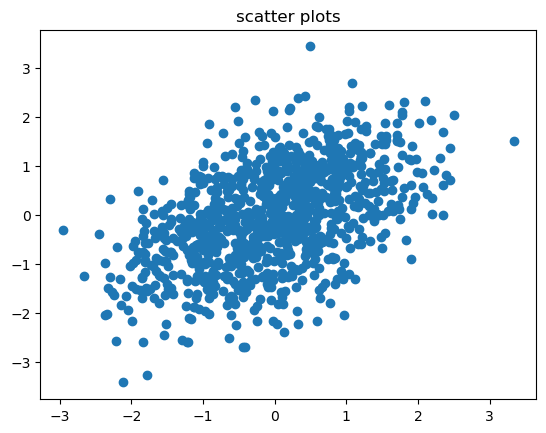

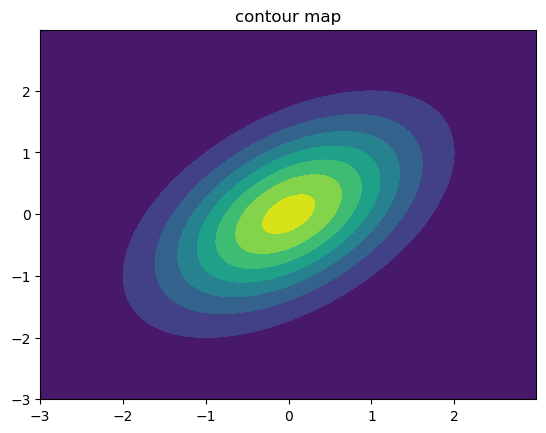

In [22]:
mu = [0,0]
Sigma = [[1.0,0.5],
         [0.5,1.0]]
mvn_dist = stats.multivariate_normal(mu,Sigma)

X = mvn_dist.rvs(1000)

plt.figure(1)
plt.scatter(X[:,0],X[:,1])
plt.title("scatter plots")

#pdf with contour map
x1,x2 = np.mgrid[-3:3:0.01,-3:3:0.01] #(600*600*1)
#print(x1,x2)
pos = np.dstack((x1,x2)) #dimensional stack : (600,600,2)
plt.figure(2)
plt.contourf(x1,x2,mvn_dist.pdf(pos))
plt.title("contour map")

### 7. Beta distribution

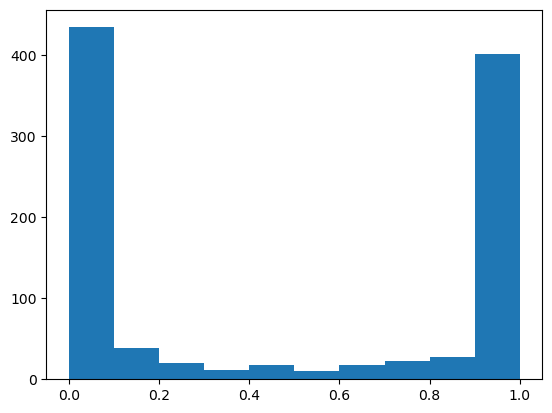

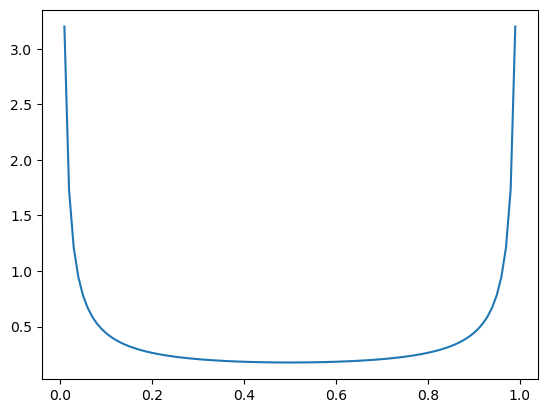

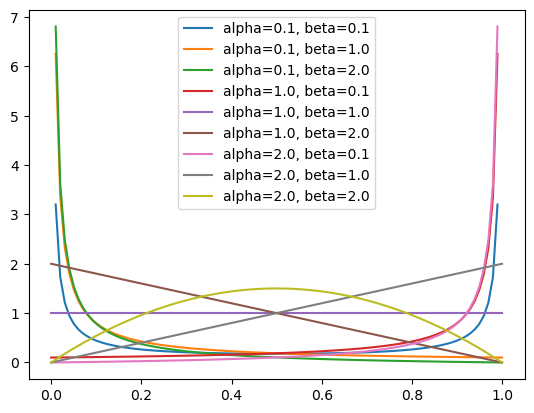

In [24]:
beta_dist = stats.beta(0.1,0.1)

X = beta_dist.rvs(1000)
plt.figure(1)
plt.hist(X,bins=10)

ls = np.linspace(0,1,100)
plt.figure(2)
plt.plot(ls,beta_dist.pdf(ls))

alpha_list = [0.1,1.0,2.0]
beta_list = [0.1,1.0,2.0]
plt.figure(3)
for alpha in alpha_list:
    for beta in beta_list:
        beta_dist = stats.beta(alpha,beta)
        plt.plot(ls,beta_dist.pdf(ls),label="alpha="+str(alpha)+", beta="+str(beta))
plt.legend()
plt.show()

### 8. Dirichlet Distribution

C:\Users\kawaw\AppData\Local\Temp\ipykernel_3740\230737502.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


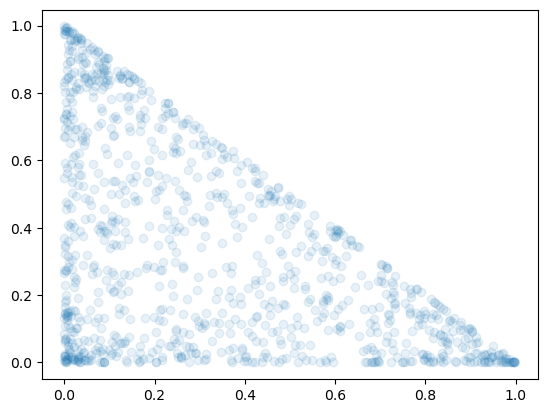

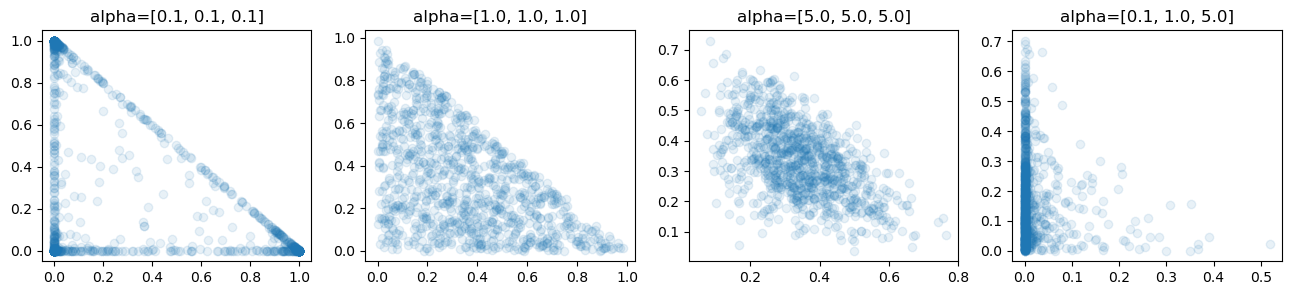

In [25]:
alpha = [0.5,0.5,0.5]
dir_dist = stats.dirichlet(alpha)
X = dir_dist.rvs(1000)

plt.figure(1)
plt.scatter(X[:,0],X[:,1],alpha=0.1)

#alpha 
alpha_list = [[0.1,0.1,0.1],[1.0,1.0,1.0],
              [5.0,5.0,5.0],[0.1,1.0,5.0]]

fig,ax = plt.subplots(1,4,figsize=(16,3))
for i, alpha in enumerate(alpha_list):
    dir_dist = stats.dirichlet(alpha)
    X = dir_dist.rvs(1000)
    ax[i].scatter(X[:,0],X[:,1],alpha=0.1)
    ax[i].set_title("alpha="+str(alpha))
fig.show()

### 9. gamma distribution

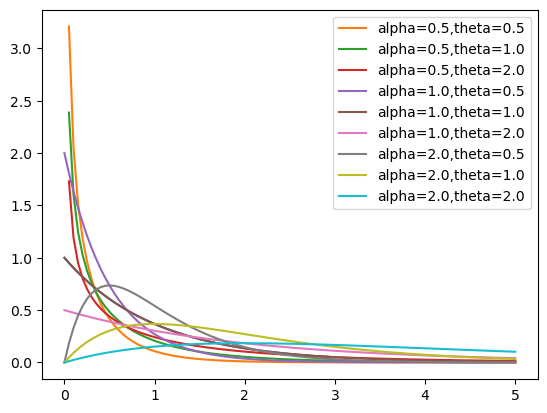

In [26]:
alpha,theta = 1.0,1.0
gam_dist = stats.gamma(a=alpha,scale=theta)

plt.figure(1)
ls = np.linspace(0,3,100)
plt.plot(ls,gam_dist.pdf(ls))

ls = np.linspace(0,5,100)

alpha_list = [0.5,1.0,2.0]
theta_list = [0.5,1.0,2.0]

for alpha in alpha_list:
    for theta in theta_list:
        gam_dist = stats.gamma(a=alpha,scale=theta)
        plt.plot(ls,gam_dist.pdf(ls),label="alpha="+str(alpha)+",theta="+str(theta))
plt.legend()
plt.show()

### 10.mixture model

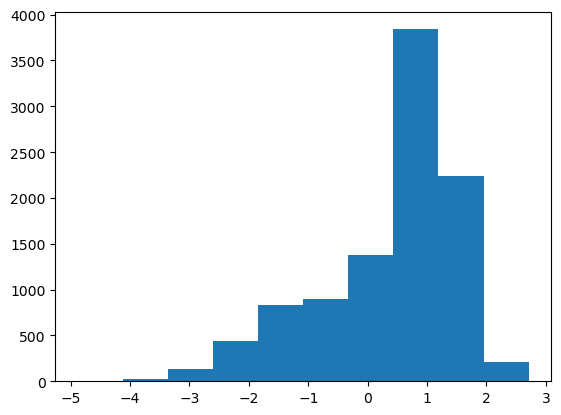

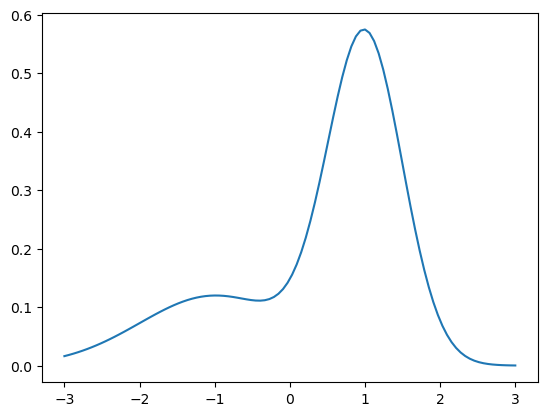

In [28]:
#bernouill dist + gaussian dist
mu = 0.3
d1 = stats.norm(1.0,0.5)
d2 = stats.norm(-1.0,1.0)

#initialization of samples
N = 10000
Z = np.zeros(N)
X = np.zeros(N)

for i in range(N):
    Z[i] = stats.bernoulli(mu).rvs()
    if Z[i] == 0:
        X[i] = d1.rvs()
    else:
        X[i] = d2.rvs()

plt.figure(1)
plt.hist(X,bins=10)

#regression of mixture model
def mixture_pdf(mu,d1,d2,x):
    return (1-mu)*d1.pdf(x)+mu*d2.pdf(x)

ls = np.linspace(-3,3,100)
plt.figure(2)
plt.plot(ls,mixture_pdf(0.3,d1,d2,ls))

### 11. Regression model

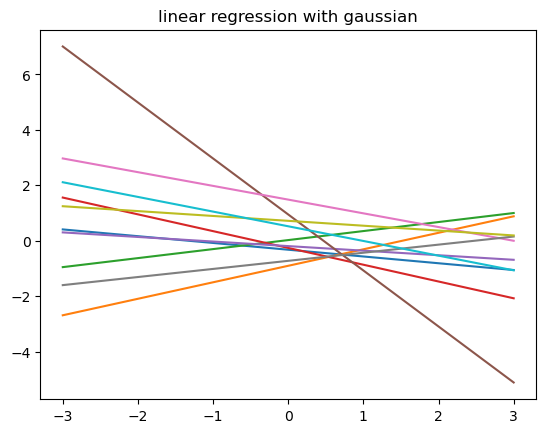

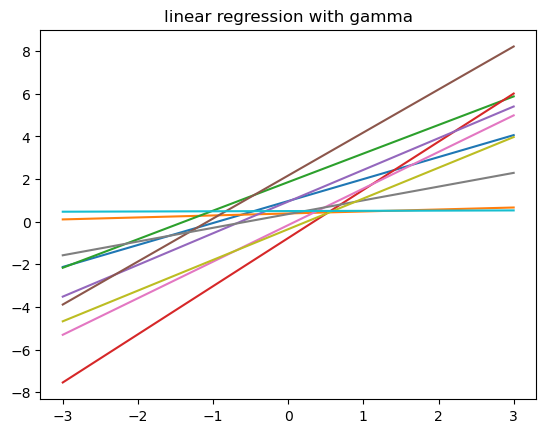

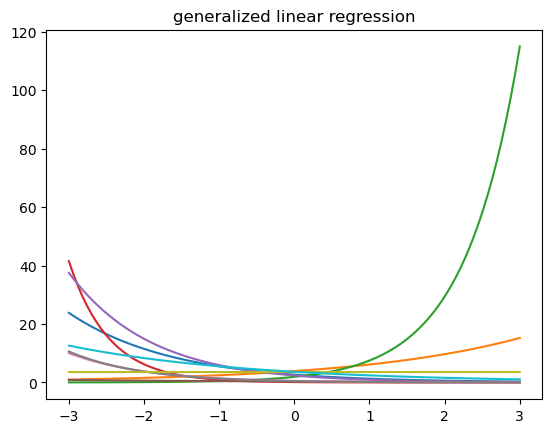

In [31]:
#linear regression
#using gaussian distribution
N = 10

ls = np.linspace(-3,3,100)
plt.figure(1)
for i in range(N):
    a = stats.norm(0,1.0).rvs()
    b = stats.norm(0,1.0).rvs()
    plt.plot(ls,a*ls+b)
plt.title("linear regression with gaussian")
plt.show()

#usin gamma distribution
plt.figure(2)
for i in range(N):
    a = stats.gamma(a=1.0,scale=1.0).rvs()
    b = stats.norm(0,1).rvs()
    plt.plot(ls,a*ls+b)
plt.title("linear regression with gamma")
plt.show()

#generalized linear model ( y = exp(ax+b))
plt.figure(3)
for i in range(N):
    a = stats.norm(0,1.0).rvs()
    b = stats.norm(0,1.0).rvs()
    plt.plot(ls,np.exp(a*ls+b))
plt.title("generalized linear regression")
plt.show()

### 12. MCMC (Markov Chain Mote Carlo method)
- estimate mean, mu, of gaussian distribution

c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
100%|██████████| 6000/6000 [00:08<00:00, 683.26it/s]
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futur

acceptance ratio : 0.494


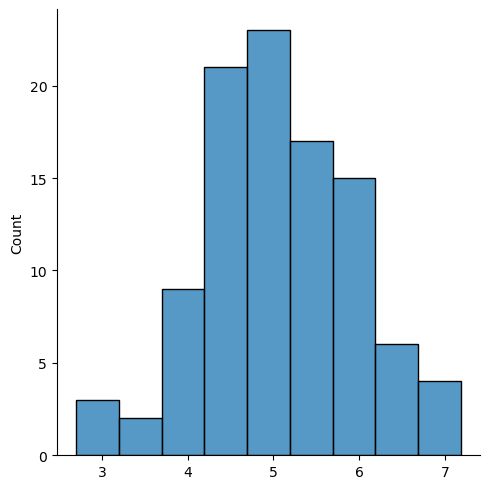

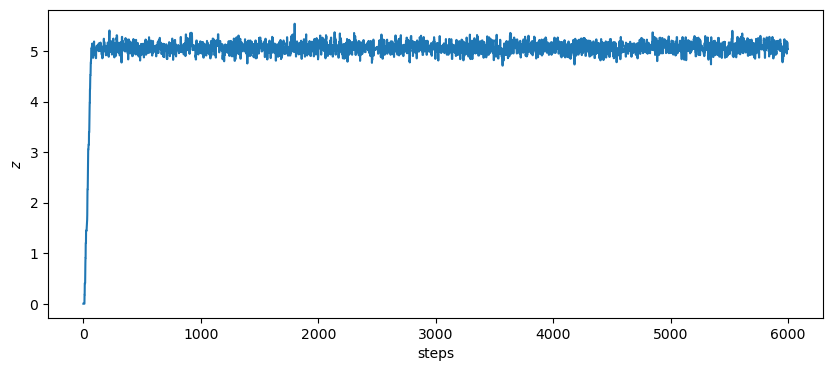

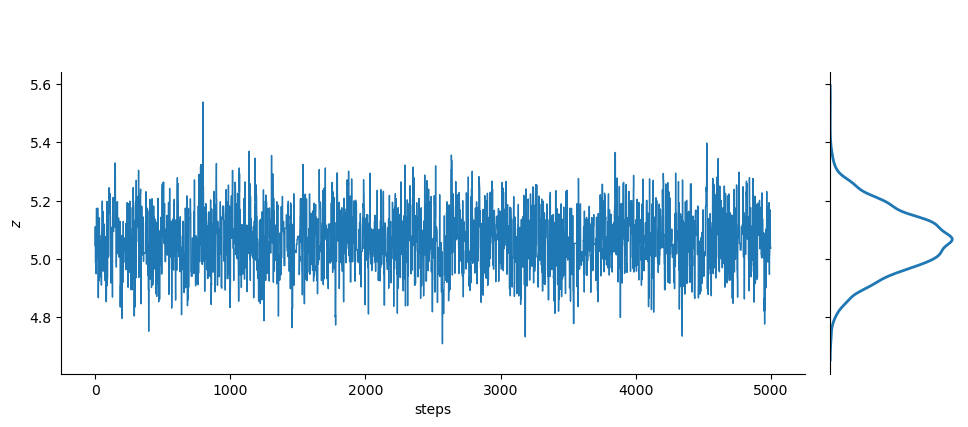

In [8]:
#preparation
n_sample = 100
true_mean = 5
true_sd = 1.0

np.random.seed(1)

#make samples
data = np.random.normal(true_mean,true_sd,n_sample)

sns.displot(data,kde=False)

#inference : metropolis-hasting method (MH method)
#hyperparameter 
n_iter = 6000
step_size = 0.3
z_init = 0.0

#current samples
z_current = z_init
#list for saving samples
posterior = []
#the number of acceptance of proposals
n_accepted = 0

def unnormalized_log_posterior(z):
    """calculate logarithm of posterior"""
    likelihood = stats.norm(z,true_sd).logpdf(data).sum() #gaussian distribution with mean current sample and sd known value
    prior = stats.norm(0,10).logpdf(z)
    return likelihood + prior

#inference
np.random.seed(1)
for i in tqdm.tqdm(range(n_iter)):
    z_proposal = z_current + step_size*np.random.uniform(-1,1) #z_current + epsilon 

    logp_current = unnormalized_log_posterior(z_current)
    logp_proposal = unnormalized_log_posterior(z_proposal)
    #r : get value in [0,1]
    r = np.random.random()
    #MH method
    #logp_proposal > logp_current : accept
    #logp_proposal < logp_current : accept with np.exp(logp_proposal - logp_current)
    if np.exp(logp_proposal-logp_current) > r:
        n_accepted += 1
        z_current = z_proposal
    posterior.append(z_current)

print("acceptance ratio : {:.3f}".format(n_accepted/n_iter)) 

#trace plot
plt.figure(figsize = (10,4))
plt.plot(posterior,lw=1.5)
plt.xlabel("steps")
plt.ylabel("$z$")
plt.title("trace plot")

#delete burn-in duration ; burn-in duration is affected by init value
n_burnin = 1000
x,y = np.arange(n_iter-n_burnin),posterior[n_burnin:]

#plot
g = sns.JointGrid() #combine multiple plots
##main plot
sns.lineplot(x=x,y=y,linewidth=1,ax=g.ax_joint)
#plot along y-axis
sns.kdeplot(y=y,linewidth=2,ax=g.ax_marg_y)
g.ax_joint.set_xlabel("steps")
g.ax_joint.set_ylabel("$z$")
g.ax_marg_x.set_axis_off()
g.fig.set_figwidth(10)
g.fig.set_figheight(4)

#### MCMC: random walk MH method

  0%|          | 0/4000 [00:00<?, ?it/s]C:\Users\kawaw\AppData\Local\Temp\ipykernel_13104\2444772641.py:12: RuntimeWarning: overflow encountered in exp
  if np.exp(logp_proposal-logp_current)>r:
100%|██████████| 6000/6000 [00:08<00:00, 674.95it/s]
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

Rhat : 1.000


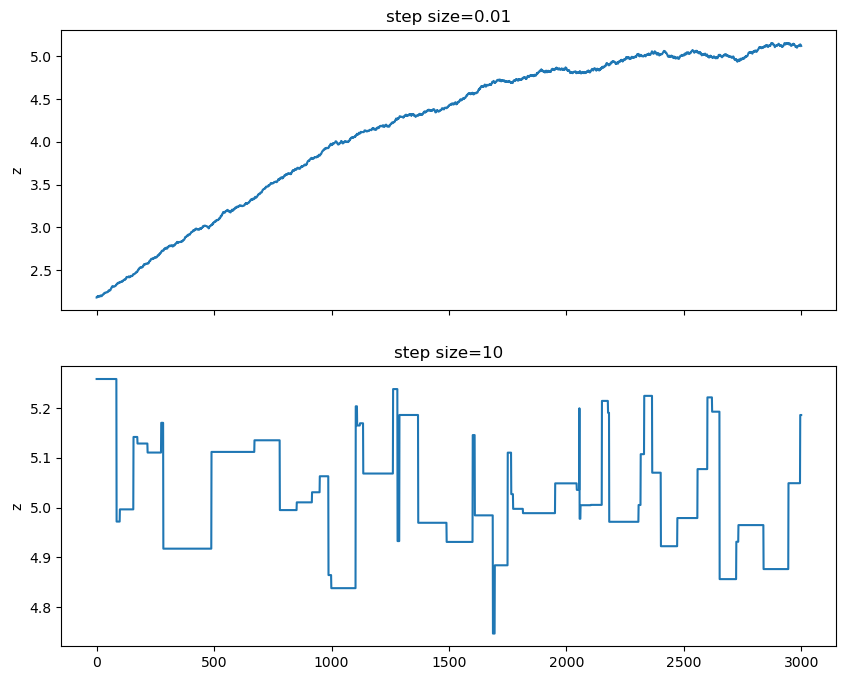

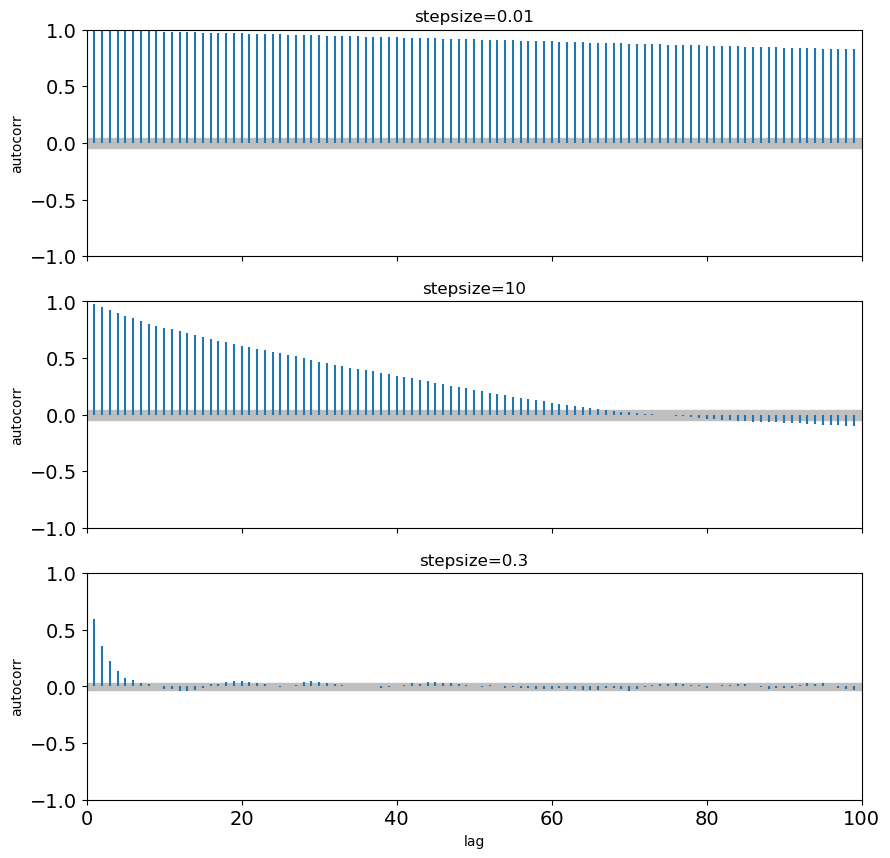

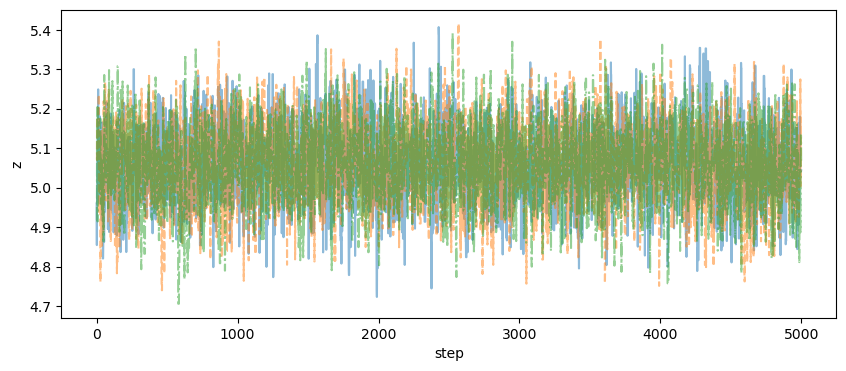

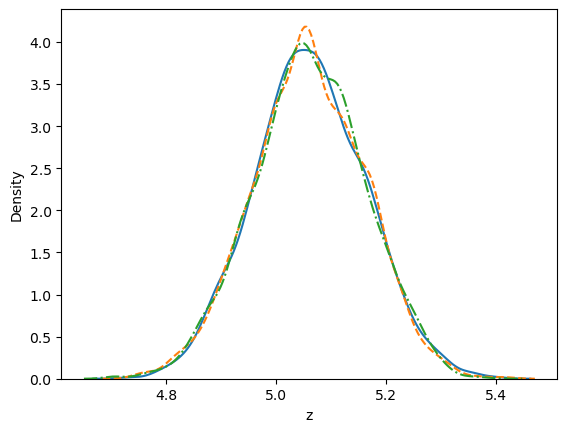

In [14]:
def randomwalk_MH(x_init,step_size=0.3,n_iter=6000,n_burnin=1000):
    x_current = x_init
    posterior=[]

    for i in tqdm.tqdm(range(n_iter)):
        x_proposal = x_current + step_size*np.random.uniform(-1,1)

        r = np.random.rand()
        logp_current = unnormalized_log_posterior(x_current)
        logp_proposal = unnormalized_log_posterior(x_proposal)

        if np.exp(logp_proposal-logp_current)>r:
            x_current = x_proposal
        posterior.append(x_current)
    
    return posterior[n_burnin:]

#too small step size
posterior_small_step = randomwalk_MH(0,0.01,4000,1000)

#too large step size
posterior_large_step = randomwalk_MH(0,10,4000,1000)

#traceplot
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,8))
ax[0].plot(posterior_small_step)
ax[0].set_title("step size=0.01")
ax[0].set_ylabel("z")

ax[1].plot(posterior_large_step)
ax[1].set_title("step size=10")
ax[1].set_ylabel("z")


#check autocorrelation -> correlogram
import arviz as az

fig,ax = plt.subplots(3,1,figsize=(10,10),sharex=True)
az.plot_autocorr(np.array(posterior_small_step[n_burnin:]),ax=ax[0])
ax[0].set_title("stepsize=0.01")
ax[0].set_ylabel("autocorr")
az.plot_autocorr(np.array(posterior_large_step[n_burnin:]),ax=ax[1])
ax[1].set_title("stepsize=10")
ax[1].set_ylabel("autocorr")
az.plot_autocorr(np.array(posterior[n_burnin:]),ax=ax[2])
ax[2].set_title("stepsize=0.3")
ax[2].set_xlabel("lag")
ax[2].set_ylabel("autocorr")

#check convergence regardless of initial values
#sampling by 3 chains
x_inits = np.random.uniform(-1,1,3)
posteriors = [randomwalk_MH(x_init) for x_init in x_inits]
posteriors = np.array(posteriors).transpose()

#traceplots
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(posteriors[:,0],lw=1.5,alpha=0.5)
ax.plot(posteriors[:,1],lw=1.5,alpha=0.5,ls="--")
ax.plot(posteriors[:,2],lw=1.5,alpha=0.5,ls="-.")
ax.set_xlabel("step")
ax.set_ylabel("z")

#visualize posterior distribution
fig,ax = plt.subplots()
sns.kdeplot(posteriors[:,0])
sns.kdeplot(posteriors[:,1],ls="--")
sns.kdeplot(posteriors[:,2],ls="-.")
ax.set_xlabel("z")

#check quality of convergence : rhat : internal variance/mutual variance
rhat = az.rhat(posteriors.transpose())
print(f"Rhat : {rhat:0.3f}")



In [18]:
print(len(posteriors))

3


In [30]:
print(posterior_true)

[5.06149744 5.06144301 5.06172049 ... 5.06143698 5.06105399 5.0613656 ]


c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kawaw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


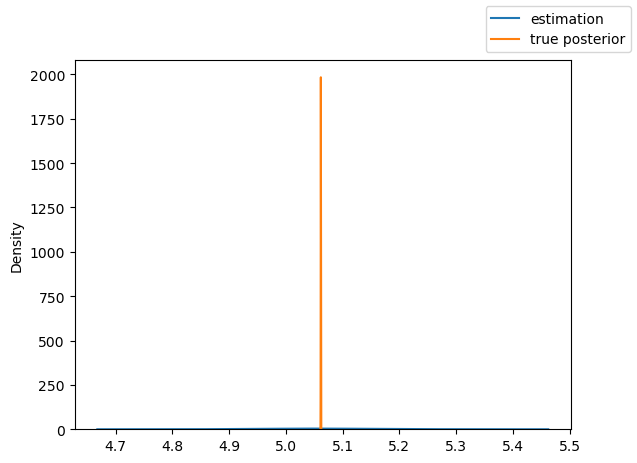

In [28]:
#analytical distribution
posteriors = np.array(posteriors).transpose()
lambda_hat = 5000+0.1
m_hat = posteriors[0].sum()/lambda_hat
posterior_true = np.random.normal(m_hat,1/lambda_hat,5000)
fig,ax = plt.subplots()
sns.kdeplot(posteriors[0],label="estimation")
sns.kdeplot(posterior_true,label="true posterior")
fig.legend()
